# Predict Student's Dropout and Academic Success Using ML Models

# Importing Libraries

In [1]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV

# Exploring Data

In [2]:
students = pd.read_csv("/kaggle/input/predict-students-dropout-and-academic-success/dataset.csv")
pd.set_option('display.max_columns', None)
students.head(8)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,10,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,4,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,10,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,4,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,10,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,12,1,17,0,12,1,22,27,10,8,0,0,1,1,1,0,50,0,0,5,10,5,11.857143,0,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,12,1,1,1,13,28,8,11,1,0,0,1,0,1,18,0,0,7,9,7,13.300000,0,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,9,4,11,1,1,1,22,27,10,10,1,0,0,0,1,0,22,0,0,5,5,0,0.000000,0,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout


# Understanding Data

In [3]:
students.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

# Data Description:

* Marital status: The marital status of the student. (Categorical)
* Application mode: The method of application used by the student. (Categorical)
* Application order: The order in which the student applied. (Numerical)
* Course: The course taken by the student. (Categorical)
* Daytime/evening attendance: Whether the student attends classes during the day or in the evening. (Categorical)
* Previous qualification: The qualification obtained by the student before enrolling in higher education. (Categorical)
* Nationality: The nationality of the student. (Categorical)
* Mother's qualification: The qualification of the student's mother. (Categorical)
* Father's qualification: The qualification of the student's father. (Categorical)
* Mother's occupation: The occupation of the student's mother. (Categorical)
* Father's occupation: The occupation of the student's father. (Categorical)
* Displaced: Whether the student is a displaced person. (Categorical)
* Educational special needs: Whether the student has any special educational needs. (Categorical)
* Debtor: Whether the student is a debtor. (Categorical)
* Tuition fees up to date: Whether the student's tuition fees are up to date. (Categorical)
* Gender: The gender of the student. (Categorical)
* Scholarship holder: Whether the student is a scholarship holder. (Categorical)
* Age at enrollment: The age of the student at the time of enrollment. (Numerical)
* International: Whether the student is an international student. (Categorical)
* Curricular units 1st sem (credited): The number of curricular units credited by the student in the first semester. (Numerical)
* Curricular units 1st sem (enrolled): The number of curricular units enrolled by the student in the first semester. (Numerical)
* Curricular units 1st sem (evaluations): The number of curricular units evaluated by the student in the first semester. (Numerical)
* Curricular units 1st sem (approved): The number of curricular units approved by the student in the first semester. (Numerical)

In [4]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

### * total columns: 35 
### * total rows: 4424  
### * dtypes: float64(5), int64(29), object(1)

In [5]:
students.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,7.819168,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,4.856692,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,8.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,10.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,46.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,1.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [6]:
students.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

### The dataset contains 0 missing values

In [7]:
students = students.rename(columns={'Nacionality': 'Nationality'})
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nationality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [8]:
print('The number of duplicated Record in the student\'s dataset is', students.duplicated().sum())

The number of duplicated Record in the student's dataset is 0


# Exploratory Data Analysis (EDA)

#### Let's see what we can learn from this data

#### There are different types of variables: numerical and categorical (nominal and ordinal)

#### Let's begin with the categorical variable

In [9]:
students['Target'].value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

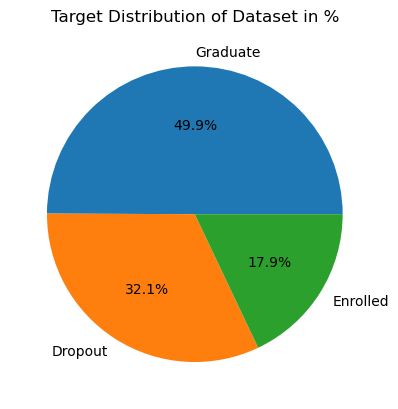

In [10]:
#store the value counts in a variable
students_target = students['Target'].value_counts()

#visualize the target variable
plt.pie(students_target, labels=students_target.index, autopct='%2.1f%%')
plt.title('Target Distribution of Dataset in %')
plt.show()

### Approximately 50% of students in the data have graduated.

**Demographics**

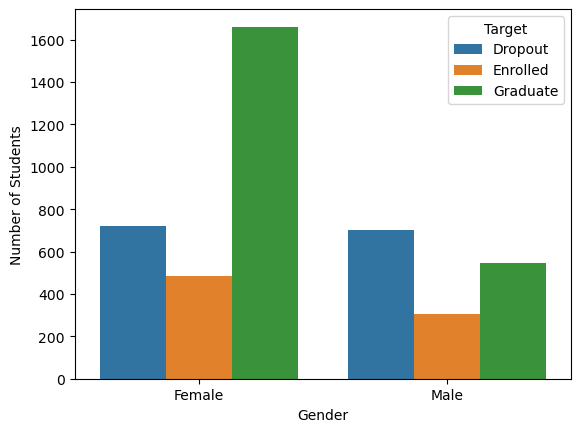

In [11]:
#gender affecting academic status of students
sns.countplot(data=students, x='Gender', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['Female', 'Male'])
plt.ylabel('Number of Students')
plt.show()

### According to the data, females have the highest number of graduants but also have the highest number of dropouts compared to males.

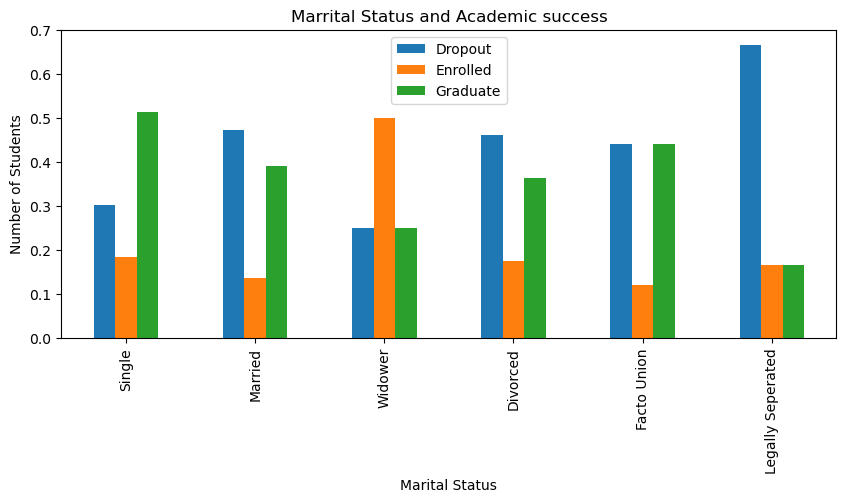

In [12]:
# Marital Status affecting the academic success of students
pd.crosstab(students["Marital status"], students["Target"], normalize='index').plot(kind="bar", figsize=(10,4), title="Marrital Status and Academic success" )
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['Single', 'Married', 'Widower', 'Divorced', 'Facto Union', 'Legally Seperated'])

plt.xlabel('Marital Status')
plt.ylabel('Number of Students')
plt.legend(loc=9)
plt.show()

### **The following deductions can be made from the above bar graph:** 

#### * Students who are legally seperated stand a high chance of dropping out.
#### * Single students have more chance of graduating as their focus
#### * Marriend and divorced individuals have more chances of dropping out but the gap between dropping out and graduating is small.



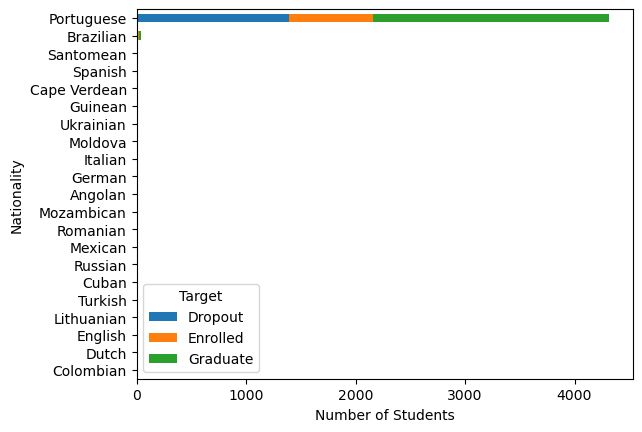

In [13]:
student_nationality = students.groupby(['Nationality', 'Target']).size().reset_index().pivot(columns='Target', index='Nationality', values=0)

# Rename the index of the DataFrame
student_nationality = student_nationality.rename(index={1:'Portuguese', 2:'German', 3:'Spanish', 4:'Italian', 5:'Dutch', 6:'English', 7:'Lithuanian', 8:'Angolan', 9:'Cape Verdean', 10:'Guinean', 11:'Mozambican', 12:'Santomean', 13:'Turkish', 14:'Brazilian', 15:'Romanian', 16:'Moldova', 17:'Mexican', 18:'Ukrainian', 19:'Russian', 20:'Cuban', 21:'Colombian'})

student_nationality_total = student_nationality.sum(axis=1)
student_nationality_sorted = student_nationality_total.sort_values(ascending=True)
student_nationality.loc[student_nationality_sorted.index].plot(kind='barh', stacked=True)

plt.xlabel('Number of Students')
plt.ylabel('Nationality')
plt.show()


### The data comprises of students of portugese descent only, which accounts for the highest frequency among all the nationalities. This means that the nationality feature is not a good predictor or an explanatory variable for the outcome of student dropout. So it can be removed.

In [14]:
# Create a variable for all the features to be removed
features_tobe_removed = ['Nationality']

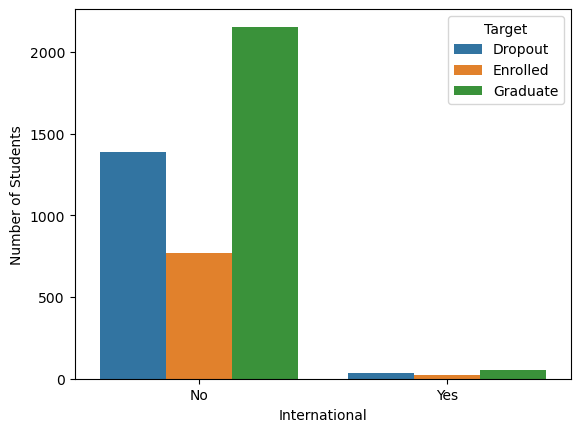

In [15]:
sns.countplot(data=students, x='International', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.ylabel('Number of Students')
plt.show()

### The data is dominated by students of the portugese nationality and thus can explain the above bar plot. The internation feature is also not a good predictor and thus can be removed.

In [16]:
features_tobe_removed.extend(['International'])
features_tobe_removed

['Nationality', 'International']

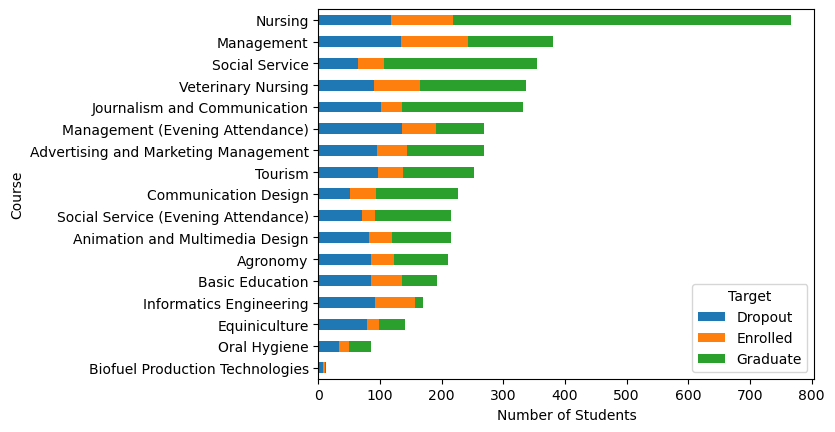

In [17]:
# Student's course affecting the academic success of students
student_course = students.groupby(['Course', 'Target']).size().reset_index().pivot(columns='Target', index='Course', values=0)

# Let's rename the index of the DataFrame
student_course = student_course.rename(index={
    1:'Biofuel Production Technologies',
    2:'Animation and Multimedia Design',
    3:'Social Service (Evening Attendance)',
    4:'Agronomy',5:'Communication Design',
    6:'Veterinary Nursing',
    7:'Informatics Engineering',
    8:'Equiniculture',
    9:'Management',
    10:'Social Service',
    11:'Tourism',
    12:'Nursing',
    13:'Oral Hygiene',
    14:'Advertising and Marketing Management',
    15:'Journalism and Communication',
    16:'Basic Education',
    17:'Management (Evening Attendance)'})

student_course_total = student_course.sum(axis=1)
student_course_sorted = student_course_total.sort_values(ascending=True)
student_course.loc[student_course_sorted.index].plot(kind='barh', stacked=True)

plt.xlabel('Number of Students')
plt.show()

### Nursing course produced the highest number of graduates while management course produced the highest number of dropouts.

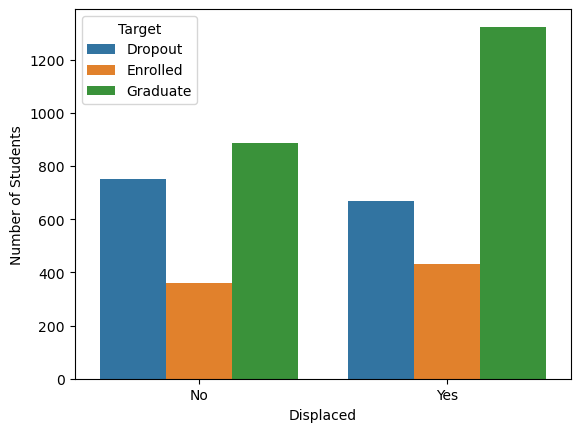

In [18]:
# Displaced students and the academic success of students
sns.countplot(data=students, x='Displaced', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.ylabel('Number of Students')
plt.show()

### Students who already graduated are mostly displaced students.



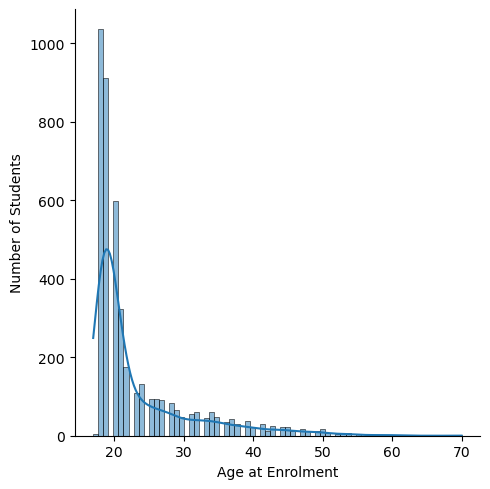

In [19]:
# Age and the academic success of students
sns.displot(data=students, x='Age at enrollment', kde=True)
students['Age at enrollment'].describe()

plt.xlabel('Age at Enrolment')
plt.ylabel('Number of Students')
plt.show()

### The above distplot is positively skewed. This shows that students enroll between the ages 17 and 70 with the mean age (majority) at age 23 years old. 

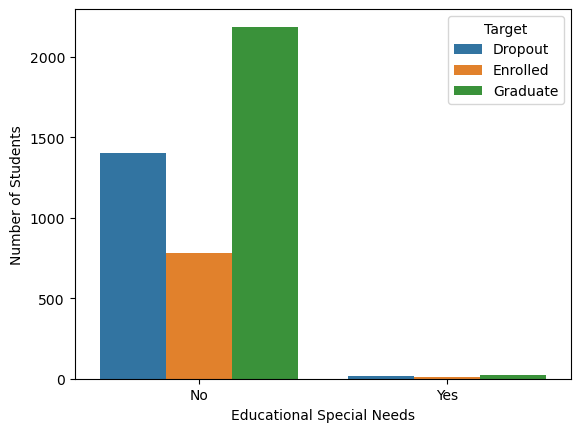

In [20]:
sns.countplot(data=students, x='Educational special needs', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.xlabel('Educational Special Needs')
plt.ylabel('Number of Students')
plt.show()

### Students who graduated and dropped do not have special needs. 

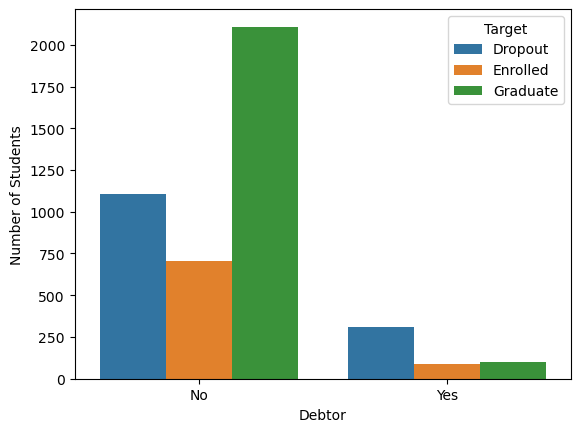

In [21]:
sns.countplot(data=students, x="Debtor", hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.xlabel('Debtor')
plt.ylabel('Number of Students')
plt.show()

### Students with no debts enrolled and graduated while few students  in debt enrolled and dropped out.

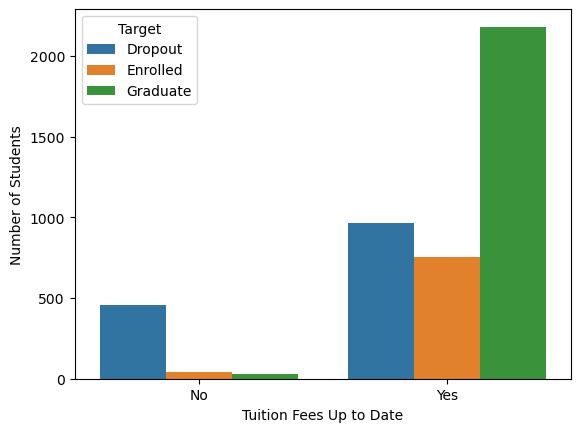

In [22]:
sns.countplot(data=students, x="Tuition fees up to date", hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.xlabel('Tuition Fees Up to Date')
plt.ylabel('Number of Students')
plt.show()

### Students with tuition fees upto date enrolled and graduated while few students with no tuition fees enrolled and dropped out.

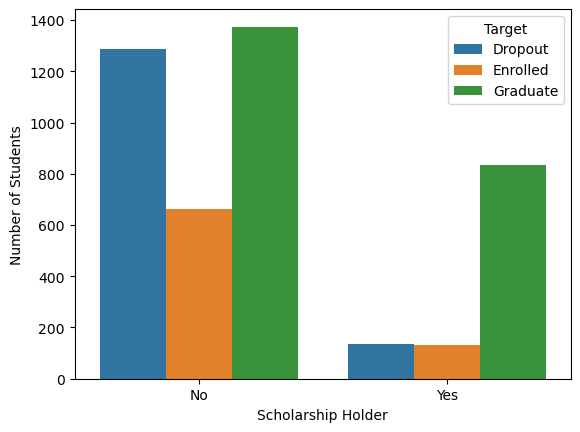

In [23]:
# Scholarship holders and the academic success of students
sns.countplot(data=students, x="Scholarship holder", hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.xlabel('Scholarship Holder')
plt.ylabel('Number of Students')
plt.show()

### From the above graph, we can deduce that students with scholaships have higher chances of graduating than dropping out.

# Feature Selection

### There are a lot of features, let's group them then find their correlation with the target variable

In [24]:
# Demographic data

demo_data = students[["Marital status", "Nationality", "Displaced", "Gender", "Age at enrollment", "International", "Target"]]

# Socio-economic data
se_data = students[["Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", "Educational special needs", "Debtor", "Tuition fees up to date", "Scholarship holder", "Target"]]

# Macro-economic Enrollment Data
me_data = students[['Unemployment rate', 'Inflation rate', 'GDP', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Target']]

# Academic data
academic_data = students[['Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Target']]



/tmp/ipykernel_33/3856920338.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(demo_data.corr(), annot=True, cmap='coolwarm', fmt=' .2f')


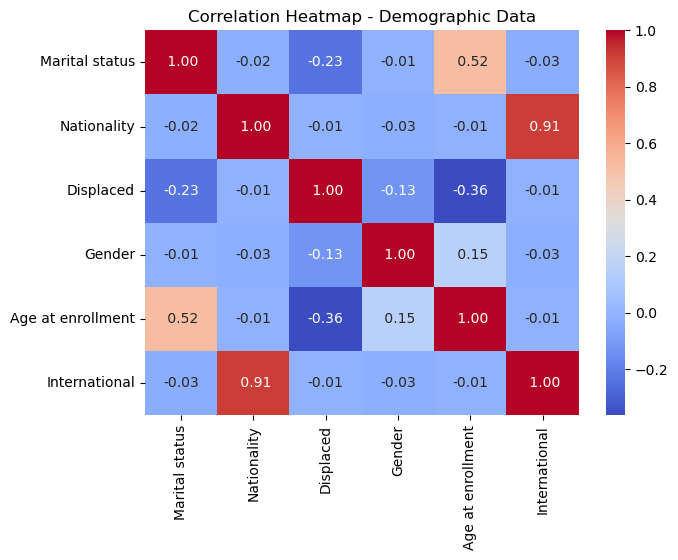

In [25]:
# Correlation Matric for Demographic data

plt.figure(figsize=(7,5))
sns.heatmap(demo_data.corr(), annot=True, cmap='coolwarm', fmt=' .2f')
plt.title('Correlation Heatmap - Demographic Data')
plt.show()

### * International and Nationality has 0.91 correlation while all other features seem to be normally related to the Target varible.

/tmp/ipykernel_33/3305102859.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(se_data.corr(), annot=True, fmt=' .2f')


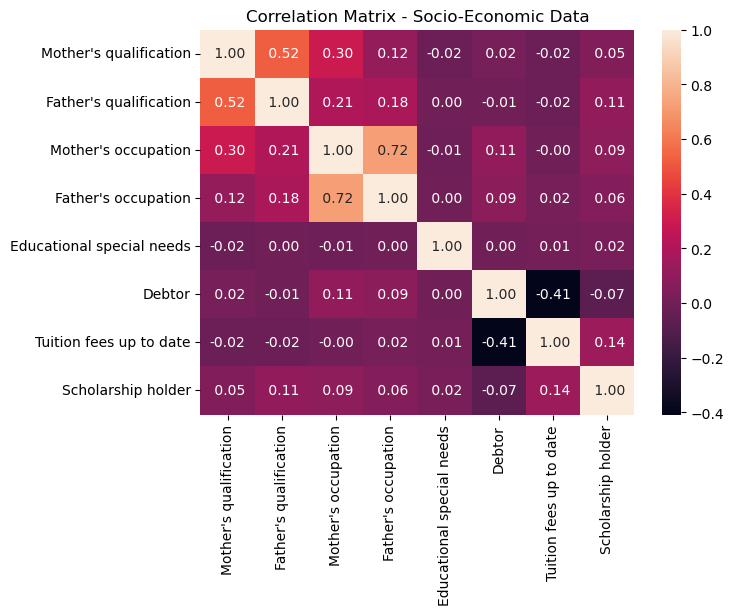

In [26]:
# Correlation Matrix for socio-economic data
plt.figure(figsize=(7,5))
sns.heatmap(se_data.corr(), annot=True, fmt=' .2f')
plt.title('Correlation Matrix - Socio-Economic Data')
plt.show()

/tmp/ipykernel_33/2896886052.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(me_data.corr(), annot=True, cmap='YlGnBu', fmt=' .2f')


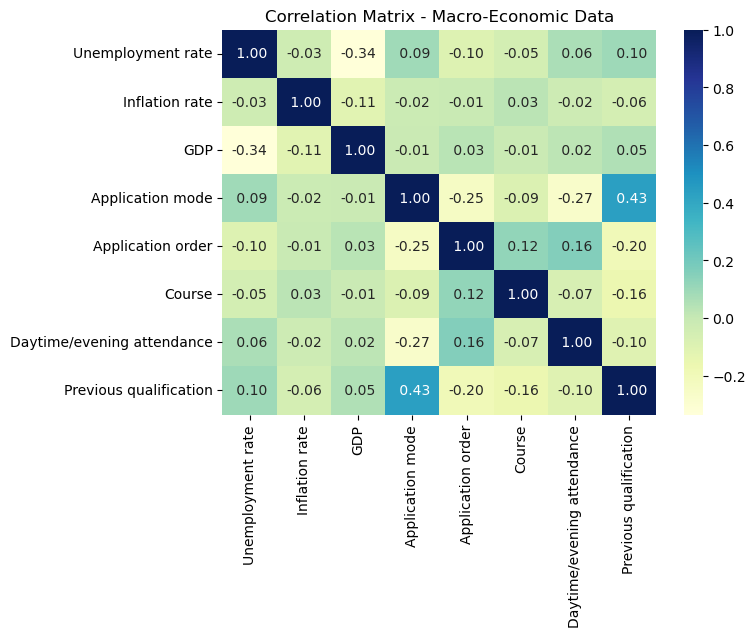

In [27]:
# Correlation Matrix for Macro-Economic Data
plt.figure(figsize=(7,5))
sns.heatmap(me_data.corr(), annot=True, cmap='YlGnBu', fmt=' .2f')
plt.title('Correlation Matrix - Macro-Economic Data')
plt.show()

/tmp/ipykernel_33/2447112743.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(academic_data.corr(), annot=True, cmap='coolwarm', fmt=' .2f')


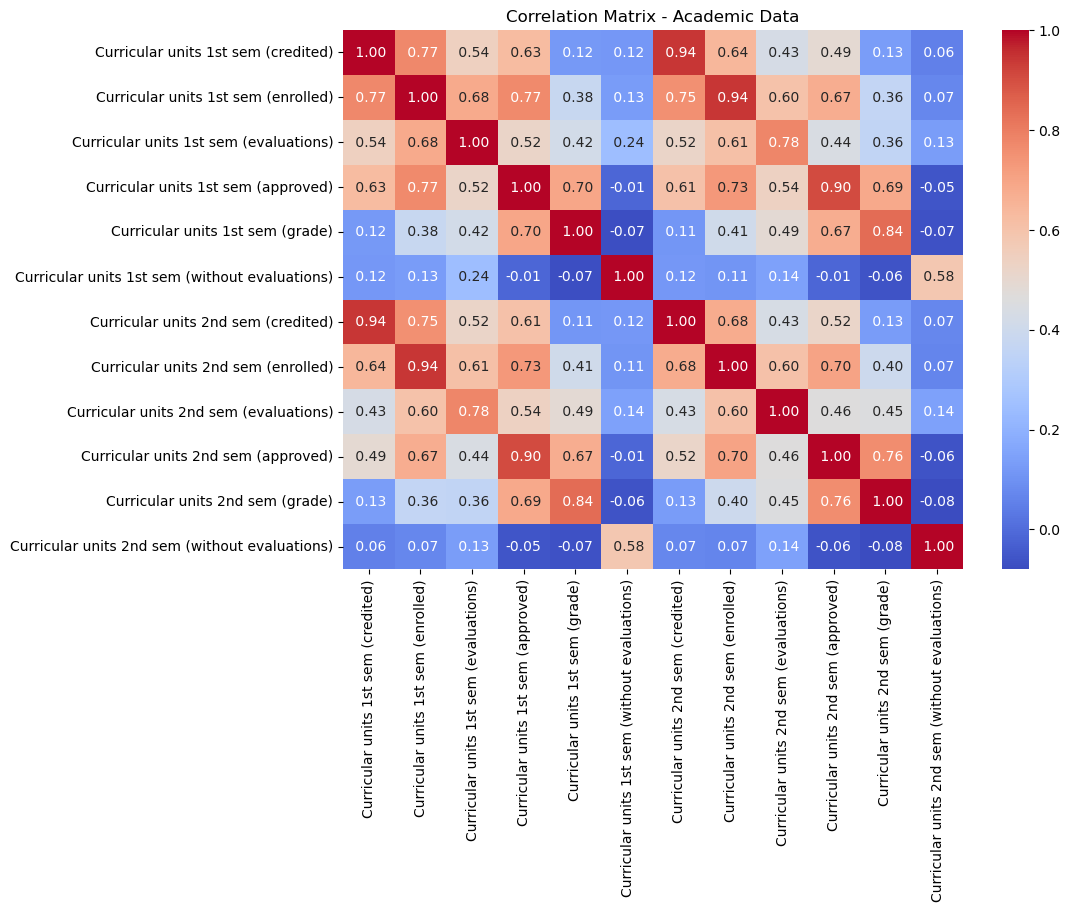

In [28]:
# Correlation Matrix for Academic Data
plt.figure(figsize=(10,7))
sns.heatmap(academic_data.corr(), annot=True, cmap='coolwarm', fmt=' .2f')
plt.title('Correlation Matrix - Academic Data')
plt.show()

### To reduce redundancy and a case of potential overfitting in the dataset, let's group and remove feautures with similar correlations.

## **Features with similar correlations that can be removed**
### * Curricular units 1st sem (credited) correlates with sem 2 = 0.94
### * Curricular units 1st sem (enrolled) correlates with sem 2 = 0.94
### * Curricular units 1st sem (evaluation) correlates with sem 2 = 0.78
### * Curricular units 1st sem (approved) correlates with sem 2 = 0.90
### * Curricular units 1st sem (grade) correlates with sem 2 = 0.84

### Moreover sem 2 data seems to correlate more with the Target variable so let's remove Sem 1 data.

In [29]:
# Add the sem 1 data to the list of features to be removed
features_tobe_removed.extend(["Curricular units 1st sem (credited)", "Curricular units 1st sem (enrolled)",
       "Curricular units 1st sem (evaluations)", "Curricular units 1st sem (approved)", "Curricular units 1st sem (grade)"])
features_tobe_removed

['Nationality',
 'International',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)']

In [30]:
# Perfom deminsionality reducation via drop
students.drop(features_tobe_removed, axis=1, inplace=True)
students.head(3)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,13,10,6,10,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,3,4,4,1,0,0,0,1,0,19,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,22,27,10,10,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout


### Since we are predicting Student's dropout and academic success 'Enrolled' category is of no use.

In [31]:
students['Target'].value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

In [32]:
# Remove all rows in the datafram where the value in the Target column equals Enrolled
students = students[students.Target != 'Enrolled']

# Modelling

## Label Encoding of Target Variable

In [33]:
# Converting Target Variable into Numeric Form

encoder = LabelEncoder()
students['Target'] = encoder.fit_transform(students['Target'])
students.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,13,10,6,10,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,6,1,11,1,1,1,3,4,4,1,0,0,0,1,0,19,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,5,1,1,22,27,10,10,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,8,2,15,1,1,23,27,6,4,1,0,0,1,0,0,20,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,12,1,3,0,1,22,28,10,10,0,0,0,1,0,0,45,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


## Splitting Features and Target Variables into X and Y

In [34]:
X = students.drop('Target', axis=1)
y = students['Target']

# Feature Scaling


In [35]:
# Used MinMaxScaler on the X data
scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(X)

## Train-Test Split

In [36]:
# Splitting the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Building a base model:
## * Logistic Regression
## * Random Forest
## * Decision Tree Classifier
## * K-Nearest Neighbors
## * XGBClassifier

In [43]:
# Create a function to build our models
def models(X_train, y_train):

    # Logistic Regression
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    
    # Random Forest
    rfc = RandomForestClassifier()
    rfc.fit(X_train, y_train)
    
    # Decision Trees
    dt = DecisionTreeClassifier()
    dt.fit(X_train,y_train)


    # K-Nearest Neighbors
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    
    # XG-boost
    xgb = XGBClassifier()
    xgb.fit(X_train, y_train)

    return lr, dt, rfc, knn, xgb

lr, dt, rfc, knn, xgb = models(X_train, y_train)

# prediction
y_pred_lr = lr.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_rfc = rfc.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_xgb = xgb.predict(X_test)


# Model Evaluation

In [44]:
# Create a function to evaluate the models
def evaluate_models(X_test, y_test, models):
    results = [] # A list to store the evaluation results of each model
    for name, model in models.items():

        # make prediction on the test data
        y_pred = model.predict(X_test)

        # calculate the evaluation metric scores
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)

        # store the results in a list of dictionary
        results.append({'Model': name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall})
    
    # Convert the lit of dictionaries to a pandas DataFrame
    return pd.DataFrame(results)

# define a dict containing the trained models for each algorithm
models = {'Logistic Regression': lr, 'Decision Tree': dt, 'Random Forest': rfc, 'KNN': knn, 'xgboost' : xgb}

# call the evaluate models function on the test data and models dictionary
results_df = evaluate_models(X_test, y_test, models)

print(results_df)

                 Model  Accuracy  Precision    Recall
0  Logistic Regression  0.898072   0.885010  0.959911
1        Decision Tree  0.852617   0.885135  0.875278
2        Random Forest  0.892562   0.888889  0.944321
3                  KNN  0.818182   0.816367  0.910913
4              xgboost  0.902204   0.902128  0.944321
